In [2]:
import re
import jieba
import numpy as np
import pandas as pd
import matplotlib as mpl 
from pyecharts import Geo
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pylab import mpl


ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "/Users/zhangsong/.virtualenvs/pachong_py3/lib/python3.6/site-packages/lml/utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [3]:
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
plt.rcParams['legend.fontsize']=12
plt.rcParams['figure.figsize']=[15,9]


In [4]:
#导入数据
data=pd.read_csv(r'pachong_info[fuben1].csv',encoding='utf-8')

In [5]:
data.head(301)


,Unnamed: 0,职位,薪资,公司名称,公司地址,工作年限,学历
0,0,爬虫工程师,15k-30k,北京恒昌利通,北京 海淀区 马连洼,3-5年,本科
1,1,Python爬虫,15k-30k,软通动力,深圳 龙岗区 坂田,3-5年,本科
2,2,爬虫工程师,20k-40k,小米,北京 海淀区 清河,3-5年,本科
3,3,爬虫工程师,12k-20k,中科聚网,北京 海淀区 皂君庙,5-10年,本科
4,4,爬虫工程师,5k-10k,山舟网络,石家庄,1-3年,大专
5,5,爬虫工程师,15k-30k,瑞幸咖啡,厦门,3-5年,本科
6,6,爬虫工程师,6k-9k,鹏凌程,沈阳,1-3年,学历不限
7,7,爬虫工程师,12k-18k,深圳来电科技有限公司,深圳 南山区 科技园,3-5年,本科
8,8,爬虫工程师,16k-30k,涂鸦智能,杭州 西湖区 古荡,3-5年,学历不限
9,9,爬虫,15k-25k,深绘智能,成都,3-5年,本科


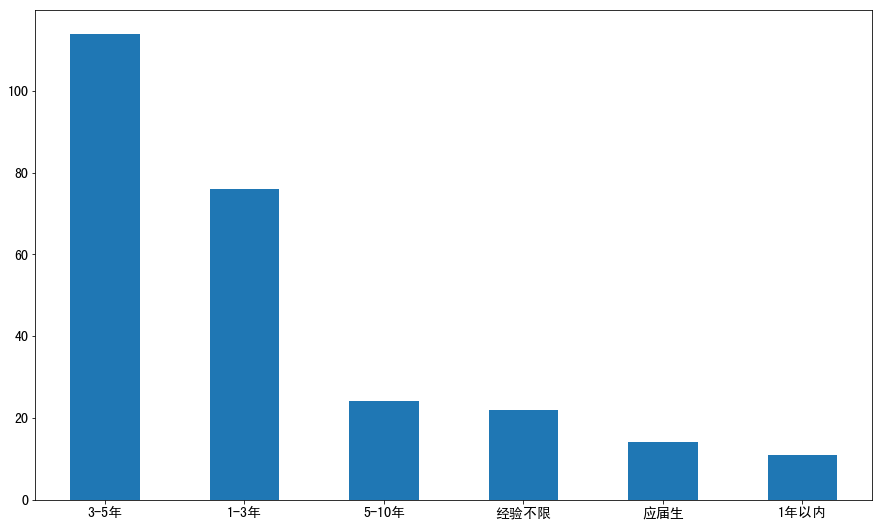

In [6]:
data['工作年限'].value_counts().plot(kind='bar',rot=0)

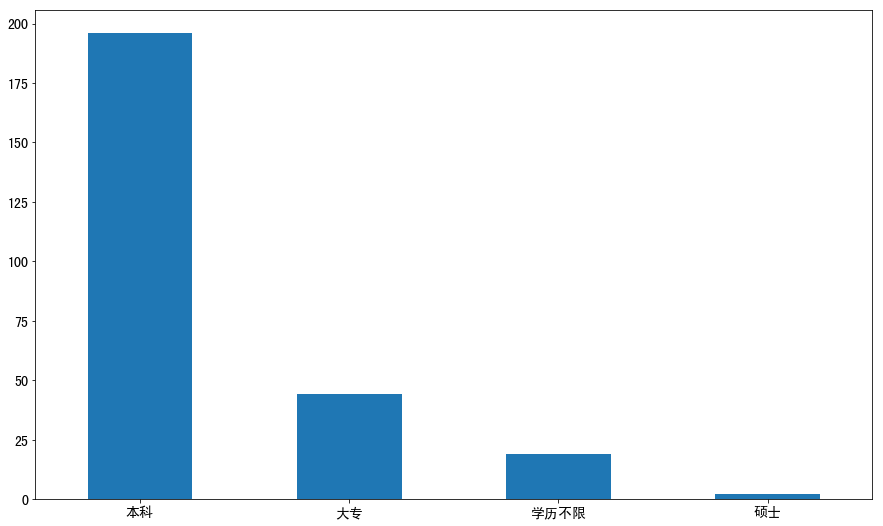

In [7]:
data['学历'].value_counts().plot(kind='bar',rot=0)

In [8]:
final = ''

stopword = ['python','Python','工程师','CV','爬虫','开发','Developer','讲师','架构师','自动化','老师','讲师',',','(',')','/']
for n in range(data.shape[0]):
    seg_list=list(jieba.cut(data['职位'][n]))
    for seg in seg_list:
        if seg is not stopword:
            final = final+seg+' '


Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/bq/_9sxhs4567n4dxk86tl3pdtw0000gn/T/jieba.cache
DEBUG:jieba:Loading model from cache /var/folders/bq/_9sxhs4567n4dxk86tl3pdtw0000gn/T/jieba.cache
Loading model cost 1.444 seconds.
DEBUG:jieba:Loading model cost 1.444 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


In [9]:
final


'爬虫 工程师 Python 爬虫 爬虫 工程师 爬虫 工程师 爬虫 工程师 爬虫 工程师 爬虫 工程师 爬虫 工程师 爬虫 工程师 爬虫 爬虫 工程师 业务 爬虫 工程师 爬虫 工程师 高级 爬虫 工程师 急聘   爬虫 工程师 爬虫 爬虫 负责人 爬虫 工程师 爬虫 工程师 高级 爬虫 工程师 高级 爬虫 工程师 爬虫 工程师 网络 爬虫 工程师 爬虫 工程师 爬虫 工程师 爬虫 工程师 爬虫 工程师 爬虫 工程师 爬虫 工程师 网络 爬虫 爬虫 工程师 高级 爬虫 工程师 爬虫 工程师 爬虫 架构师 Python 爬虫 python 爬虫 工程师 爬虫 工程师 python 爬虫 java 爬虫 爬虫 工程师 爬虫 工程师 爬虫 工程师 爬虫 开发 工程师 爬虫 工程师 （ python ） 爬虫 开发 工程师 Java 爬虫 工程师 爬虫 工程师 爬虫 工程师 中级 高级 爬虫 工程师 java 爬虫 爬虫 工程师 爬虫 工程师 高级 爬虫 工程师 Python 爬虫 工程师 爬虫 工程师 爬虫 工程师 高级 爬虫 工程师 爬虫 工程师 爬虫 工程师 爬虫 工程师 爬虫 工程师 高级 爬虫 工程师 python 爬虫 实习 爬虫 工程师 爬虫 工程师 爬虫 开发 实习   ( MJ000604 ) 爬虫 工程师 Python 工程师 （ 爬虫 方向 ） 高级 爬虫 工程师 / 专家 爬虫 工程师 Python 爬虫 工程师 爬虫 工程师 Java 工程师 ( 爬虫 方向 ) 爬虫 开发 工程师 爬虫 工程师 高级 爬虫 工程师 爬虫 开发 工程师 python 爬虫 工程师 资深 爬虫 工程师 高级 爬虫 工程师 python 爬虫 工程师 python 爬虫 工程师 Python 爬虫 工程师 高级 爬虫 工程师 数据 爬虫 工程师 C# 爬虫 工程师 高级 爬虫 工程师 爬虫 专家 Pyhon 爬虫 工程师 （ Leader ） 爬虫 开发 python 爬虫 工程师 爬虫 技术 专家 高德 - 爬虫 架构 专家 Python 爬虫 工程师 高级 爬虫 工程师 爬虫 工程师 高级 爬虫 工程师 Python   爬虫 工程师 爬虫 和 页面 分析 提取 专家 爬虫 工程师 （ JAVA ） Java 爬虫 工程师 爬虫 开发 工程师 爬虫 开发 工程师 

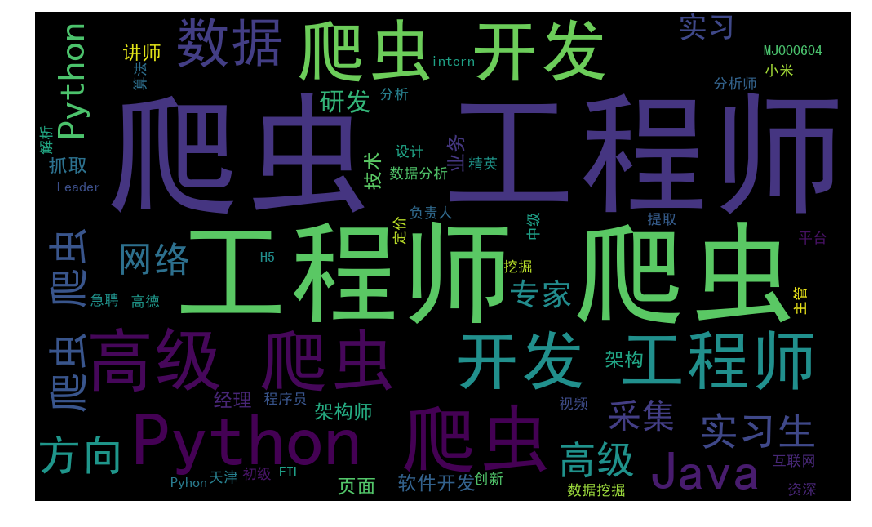

In [10]:
my_wordcloud=WordCloud(font_path = r'/Users/zhangsong/Downloads/SimHei.ttf',width=1000,height=600).generate(final)
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()

In [11]:
# plt.rcParams['figure.figsize']=[15,15]
# data['公司地址'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=np.linspace(1.5,1.5,25))
# plt.show()

In [12]:
# 提取数据集
data2=list(map(lambda x :(data['公司地址'][x],eval(re.split('k|K',data['薪资'][x])[0])*1000),range(len(data))))
# 提取价格信息
data3 = pd.DataFrame(data2)
# 转换成GEO所需要的格式
data4=list(map(lambda x:(data3.groupby(0).mean()[1].index[x],data3.groupby(0).mean()[1].values[x]),range(len(data3.groupby(0)))))


In [17]:
geo = Geo('全国python职位分布',title_color='#fff',title='left',width='1200',height='600')
arrt,value=geo.cast(data4)
geo.add('',attr,value,type='heatmap',is_visualmap=True,maptype='china', viual_range[0,300],visal_text_color='#fff')
geo_render()

SyntaxError: positional argument follows keyword argument (<ipython-input-17-a5cc02003e02>, line 3)